# Intro <a class="tocSkip">


Data: https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/

+ https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html


# Imports

## Import deps

In [1]:
# ETL libs
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE


# viz libs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# utils libs
from IPython.core.display import display, HTML


## Import data

In [2]:
%%bash
ls -l | grep csv

-rw-rw-r-- 1 1000 1000  1023 Feb 25 14:35 submission_format.csv
-rw-rw-r-- 1 1000 1000  4864 Feb 25 14:35 test_values.csv
-rw-rw-r-- 1 1000 1000  1653 Feb 25 14:35 train_labels.csv
-rw-rw-r-- 1 1000 1000  9591 Feb 25 14:35 train_values.csv


In [3]:
df_info = pd.read_csv('train_labels.csv')

df_info.info()
df_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
patient_id               180 non-null object
heart_disease_present    180 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
df_info.tail()

,patient_id,heart_disease_present
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0
179,2nx10r,0


In [5]:
df = pd.read_csv('train_values.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


# Data format

In [7]:
numerical_ft = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
                'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']


for col in df.drop(['patient_id'], axis=1).drop(numerical_ft, axis=1).columns:
    print(df[col].value_counts())
    print('---' * 10)

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64
------------------------------
normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64
------------------------------
4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64
------------------------------
0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64
------------------------------
0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64
------------------------------
2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64
------------------------------
1    124
0     56
Name: sex, dtype: int64
------------------------------
0    123
1     57
Name: exercise_induced_angina, dtype: int64
------------------------------


# Univariate

### Normal distribution test

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
import scipy.stats as stats

params       = df.drop(['patient_id', 'thal'], axis=1).columns
pvals        = []
distrib_norm = []

for param in params:
    # print(param)
    z, pval = stats.normaltest(df[param])
    # print(z)
    if(pval < 0.055):
        # print("%s has a p-value of %f - distribution is not normal" % (param, pval))
        pvals.append(pval)
        distrib_norm.append('N')
    else:
        # print("%s has a p-value of %f" % (param, pval))
        pvals.append(pval)
        distrib_norm.append('Y')

df_normal_test = pd.DataFrame(data={
    'Parameter': params,
    'pval': pvals,
    'Is the distrib normal ?': distrib_norm
})[['Parameter', 'pval', 'Is the distrib normal ?']]

df_normal_test.head()

,Parameter,pval,Is the distrib normal ?
0,slope_of_peak_exercise_st_segment,5.451316e-04,N
1,resting_blood_pressure,1.247450e-03,N
2,chest_pain_type,9.189874e-05,N
3,num_major_vessels,3.571444e-07,N
4,fasting_blood_sugar_gt_120_mg_per_dl,2.770860e-14,N


In [10]:
df_normal_test[df_normal_test['Is the distrib normal ?'] == 'Y']

,Parameter,pval,Is the distrib normal ?
5,resting_ekg_results,0.851022,Y
9,age,0.064014,Y


## Plotly pairplots

In [11]:
df_table = ff.create_table(df.head())
# iplot(df_table, filename='iris-data-head')

In [12]:
# classes = np.unique(df_info['heart_disease_present'].values).tolist()
# classes

# color_vals=[class_code[cl] for cl in df['class']]
# text=[df.loc[ k, 'class'] for k in range(len(df))]

In [13]:
pl_colorscale=[[0.0, '#19d3f3'],
               [0.333, '#19d3f3'],
               [0.333, '#e763fa'],
               [0.666, '#e763fa'],
               [0.666, '#636efa'],
               [1, '#636efa']]

In [14]:
# trace1 = go.Splom(
#     dimensions=[
#         dict(label='sepal length', values=df['sepal length']),
#         dict(label='sepal width',  values=df['sepal width']),
#         dict(label='petal length', values=df['petal length']),
#         dict(label='petal width',  values=df['petal width'])
#     ],
#     text=text,
#     marker=dict(
#         color=color_vals,
#         size=7,
#         colorscale=pl_colorscale,
#         showscale=False,
#         line=dict(width=0.5,
#                   color='rgb(230,230,230)')
#     )
# )

## Histograms for categorical features

In [15]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [16]:
name = 'slope_of_peak_exercise_st_segment'
x = df[name]

data = [
    go.Histogram(
        x=x,
        name=name)
]

iplot(data)

## Boxplots for numerical features

In [17]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


### resting_blood_pressure

In [18]:
name = 'resting_blood_pressure'
y = df[name]

trace1 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(8,81,156)',
    ),
    name = name
)

trace2 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)
    ),
    name = name + ' - suspected outliers'
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, layout)

### serum_cholesterol_mg_per_dl

In [19]:
name = 'serum_cholesterol_mg_per_dl'
y = df[name]

trace1 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(8,81,156)',
    ),
    name = name
)

trace2 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)
    ),
    name = name + ' - suspected outliers'
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, layout)

In [21]:
q1, q3 = np.percentile(y, [25, 75])
iqr = q3 - q1

uof = q3 + 3   * iqr
uif = q3 + 1.5 * iqr
lif = q1 - 1.5 * iqr
lof = q3 - 3   * iqr

print('Upper outer fence: %s' % uof)
print('Upper inner fence: %s' % uif)
print('Lower inner fence: %s' % lif)
print('Lower outer fence: %s' % lof)

Upper outer fence: 483.75
Upper inner fence: 382.5
Lower inner fence: 112.5
Lower outer fence: 78.75


### oldpeak_eq_st_depression

In [22]:
name = 'oldpeak_eq_st_depression'
y = df[name]

trace1 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(8,81,156)',
    ),
    name = name
)

trace2 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)
    ),
    name = name + ' - suspected outliers'
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, layout)

### age

In [23]:
name = 'age'
y = df[name]

trace1 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(8,81,156)',
    ),
    name = name
)

trace2 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)
    ),
    name = name + ' - suspected outliers'
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, layout)

### max_heart_rate_achieved

In [24]:
name = 'max_heart_rate_achieved'
y = df[name]

trace1 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(8,81,156)',
    ),
    name = name
)

trace2 = go.Box(
    y=y,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints = 'suspectedoutliers',
    marker = dict(
        color = 'rgb(8,81,156)',
        outliercolor = 'rgba(219, 64, 82, 0.6)',
        line = dict(
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            outlierwidth = 2)
    ),
    name = name + ' - suspected outliers'
)

data = [trace1, trace2]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, layout)

# Multivariate

## Seaborn pairplots

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



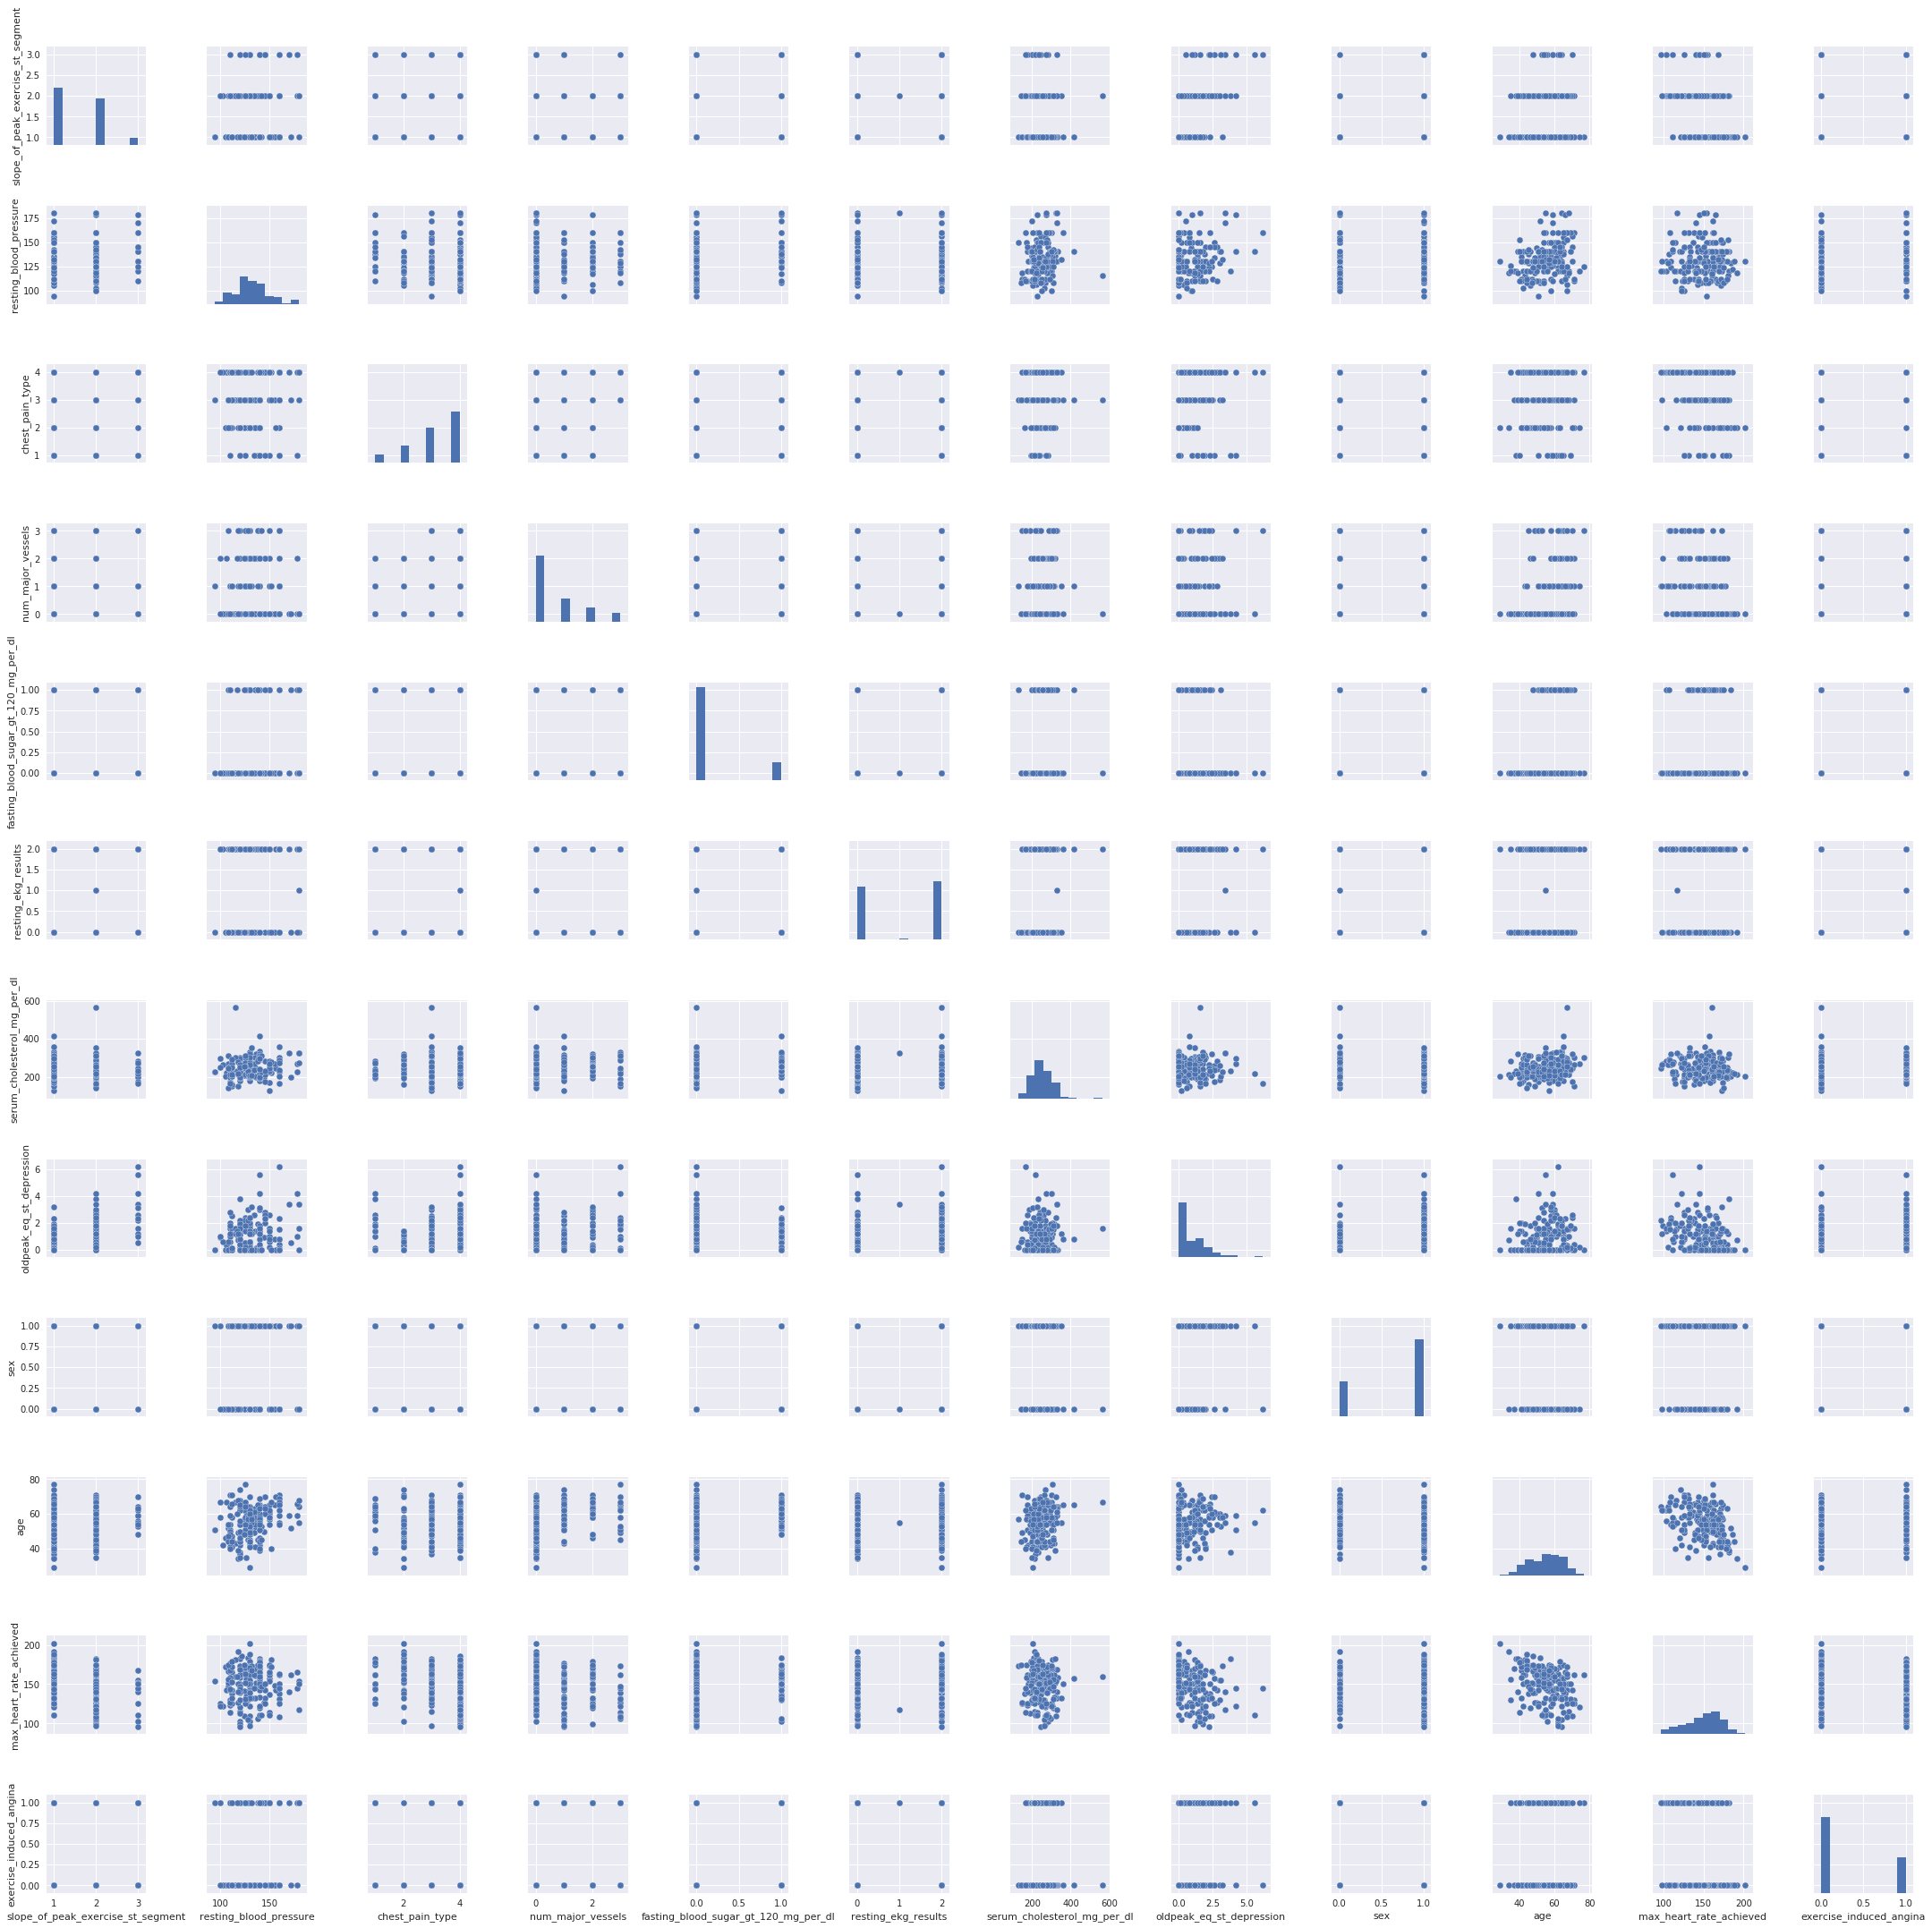

In [25]:
sns.pairplot(df)

## PCC corr

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



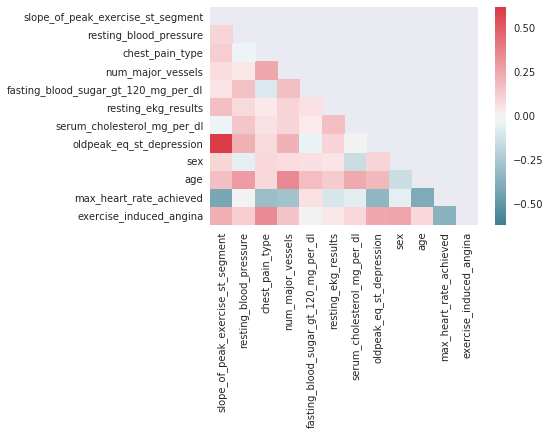

In [26]:
corr = df.corr(method="pearson")

bool_upper_matrix = np.tril(np.ones(corr.shape), k=-1).astype(np.bool)
corr = corr.where(bool_upper_matrix)
# display(corr)

#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
display(corr)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
slope_of_peak_exercise_st_segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_blood_pressure,0.098287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain_type,0.121207,-0.029296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_major_vessels,0.076832,0.042388,0.249061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,NaN,NaN,NaN,NaN,NaN
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,NaN,NaN,NaN,NaN
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,NaN,NaN,NaN


## t-SNE

In [28]:
tsne_input = df[[
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'oldpeak_eq_st_depression',
    'age'
]] # df.corr(method="pearson")

In [29]:
%%time
tsne = TSNE()
tsne_vectors = tsne.fit_transform(tsne_input.values)

CPU times: user 1.63 s, sys: 218 ms, total: 1.85 s
Wall time: 1.85 s


In [30]:
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])

tsne_vectors.head()

,x_coord,y_coord
0,8.922790,7.832450
1,-4.751862,-8.157738
2,7.481429,9.432799
3,-8.695282,-3.387480
4,10.781965,1.722214


In [31]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [32]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

---

# ...

---